In [ ]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
import os
import shutil

# Mount Google Drive
drive.mount('/content/drive')

# Set the path to the dataset directory
dataset_path = '/content/drive/MyDrive/dataset'

# Set the path to the specific class directory
klass_dir = '/content/drive/MyDrive/testCDD'


Mounted at /content/drive


In [ ]:
img_size = 64
num_classes = 4
batch_size = 32

In [ ]:
from sklearn.preprocessing import LabelBinarizer

def load_dataset():
    images = []
    labels = []
    classes = os.listdir(dataset_path)
    label_binarizer = LabelBinarizer()
    for class_name in classes:
        class_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_path):  # Check if the current item is a directory
            for image_name in os.listdir(class_path):
                image_path = os.path.join(class_path, image_name)
                try:
                    image = cv2.imread(image_path)
                    if image is not None:  # Check if the image was loaded successfully
                        image = cv2.resize(image, (img_size, img_size))
                        images.append(image)
                        labels.append(class_name)
                    else:
                        print(f"Skipping invalid image: {image_path}")
                except Exception as e:
                    print(f"Error loading image: {image_path}")
                    print(str(e))
    # Convert labels to unique binary arrays
    labels = label_binarizer.fit_transform(labels)
    return images, labels

In [ ]:
images, labels = load_dataset()

Skipping invalid image: /content/drive/MyDrive/dataset/Wheat Loose Smut/3271.gif
Skipping invalid image: /content/drive/MyDrive/dataset/Wheat Loose Smut/0191.gif
Skipping invalid image: /content/drive/MyDrive/dataset/Wheat Loose Smut/6351.gif
Skipping invalid image: /content/drive/MyDrive/dataset/Wheat Loose Smut/0121.gif
Skipping invalid image: /content/drive/MyDrive/dataset/Wheat Loose Smut/3181.gif
Skipping invalid image: /content/drive/MyDrive/dataset/Wheat Loose Smut/3191.gif
Skipping invalid image: /content/drive/MyDrive/dataset/Wheat Loose Smut/6261.gif
Skipping invalid image: /content/drive/MyDrive/dataset/Wheat Loose Smut/6271.gif
Skipping invalid image: /content/drive/MyDrive/dataset/Wheat Loose Smut/0131.gif
Skipping invalid image: /content/drive/MyDrive/dataset/Leaf Rust/07361.gif
Skipping invalid image: /content/drive/MyDrive/dataset/Leaf Rust/00931.gif
Skipping invalid image: /content/drive/MyDrive/dataset/Leaf Rust/07971.gif
Skipping invalid image: /content/drive/MyDrive

In [ ]:
for i in labels:
    print(i)

Streaming output truncated to the last 5000 lines.
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]

In [ ]:
def preprocess_dataset(images, labels):
    images = np.array(images)
    images = images.astype('float32') / 255.0
    labels = np.array(labels)
    return images, labels

In [ ]:
images, labels = preprocess_dataset(images, labels)
print(labels)

[[0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]
 ...
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]]


In [ ]:
#Splitting the data into a training and testing set
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
data_generator = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Apply augmentation only to the training set
)

data_generator.fit(train_images)

In [ ]:
data_generator = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
data_generator.fit(train_images)

In [ ]:
history = model.fit(data_generator.flow(train_images, train_labels, batch_size=batch_size), steps_per_epoch=len(train_images) // batch_size, epochs=30)



Epoch 1/30
134/134 [==============================] - 34s 250ms/step - loss: 1.0433 - accuracy: 0.5772
Epoch 2/30
134/134 [==============================] - 33s 244ms/step - loss: 0.9641 - accuracy: 0.6138
Epoch 3/30
134/134 [==============================] - 32s 235ms/step - loss: 0.9339 - accuracy: 0.6280
Epoch 4/30
134/134 [==============================] - 31s 234ms/step - loss: 0.8803 - accuracy: 0.6614
Epoch 5/30
134/134 [==============================] - 33s 250ms/step - loss: 0.8424 - accuracy: 0.6693
Epoch 6/30
134/134 [==============================] - 34s 252ms/step - loss: 0.7949 - accuracy: 0.6903
Epoch 7/30
134/134 [==============================] - 32s 236ms/step - loss: 0.7517 - accuracy: 0.7150
Epoch 8/30
134/134 [==============================] - 32s 235ms/step - loss: 0.7015 - accuracy: 0.7402
Epoch 9/30
134/134 [==============================] - 35s 260ms/step - loss: 0.6759 - accuracy: 0.7437
Epoch 10/30
134/134 [==============================] - 31s 233ms/step - l

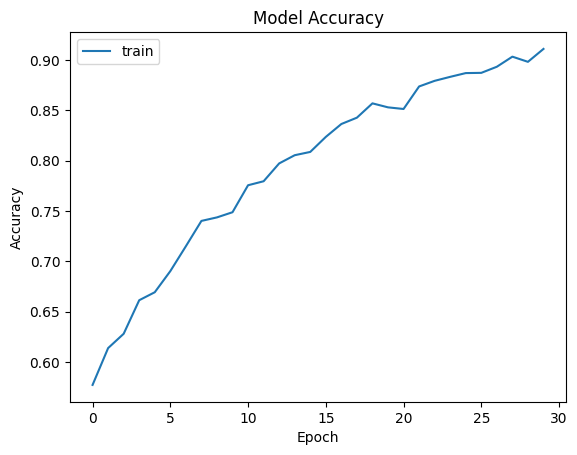

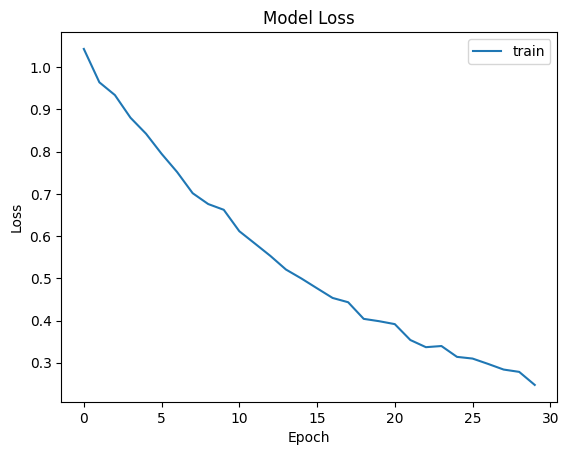

In [ ]:
# Plot accuracy
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:
history = model.fit(
    data_generator.flow(train_images, train_labels, batch_size=batch_size),
    steps_per_epoch=len(train_images) // batch_size,
    epochs=30,
    validation_data=(test_images, test_labels)  # Include validation data
)


Epoch 1/30
134/134 [==============================] - 37s 272ms/step - loss: 0.2586 - accuracy: 0.9044 - val_loss: 0.3671 - val_accuracy: 0.8862
Epoch 2/30
134/134 [==============================] - 35s 258ms/step - loss: 0.2546 - accuracy: 0.9114 - val_loss: 0.3725 - val_accuracy: 0.8825
Epoch 3/30
134/134 [==============================] - 36s 272ms/step - loss: 0.2459 - accuracy: 0.9135 - val_loss: 0.4329 - val_accuracy: 0.8685
Epoch 4/30
134/134 [==============================] - 33s 248ms/step - loss: 0.2393 - accuracy: 0.9181 - val_loss: 0.4120 - val_accuracy: 0.8750
Epoch 5/30
134/134 [==============================] - 34s 256ms/step - loss: 0.2339 - accuracy: 0.9184 - val_loss: 0.3389 - val_accuracy: 0.8974
Epoch 6/30
134/134 [==============================] - 37s 273ms/step - loss: 0.2119 - accuracy: 0.9277 - val_loss: 0.3618 - val_accuracy: 0.8899
Epoch 7/30
134/134 [==============================] - 34s 256ms/step - loss: 0.1935 - accuracy: 0.9312 - val_loss: 0.4104 - val_ac

In [ ]:
# Access validation accuracy and loss
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

print("Validation accuracy:", val_accuracy[-1])  # Print final validation accuracy
print("Validation loss:", val_loss[-1])           # Print final validation loss


Validation accuracy: 0.9253731369972229
Validation loss: 0.2574290931224823


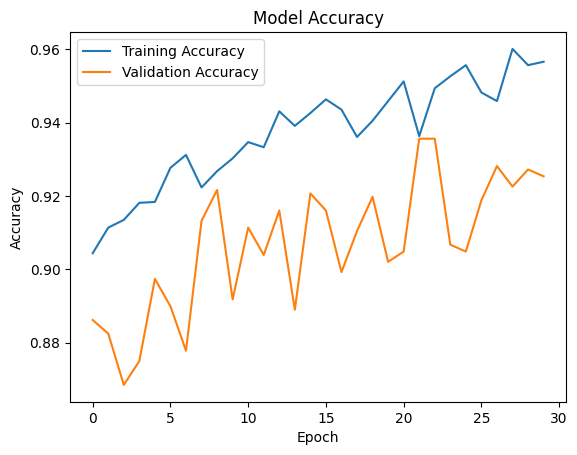

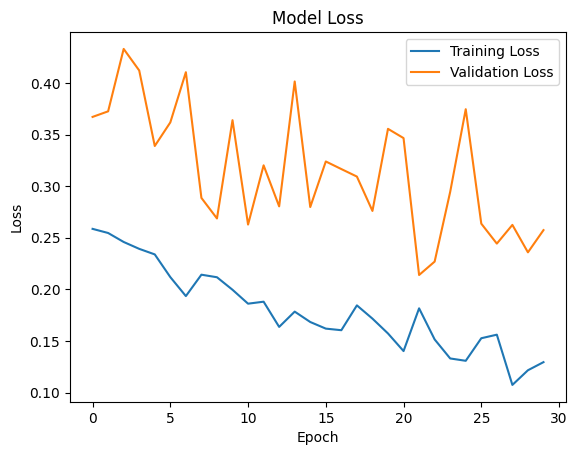

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [ ]:
precision = dict()
recall = dict()
average_precision = dict()

for i in range(data_generator.num_classes):
    precision[i], recall[i], _ = precision_recall_curve(true_classes == i, predictions[:, i])
    average_precision[i] = auc(recall[i], precision[i])

# Plot Precision-Recall Curves
plt.figure(figsize=(10, 6))

for i in range(data_generator.num_classes):
    plt.plot(recall[i], precision[i], label=f'Class {i} (AP = {average_precision[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for each class')
plt.legend(loc='best')
plt.show()

AttributeError: 'ImageDataGenerator' object has no attribute 'num_classes'

In [ ]:
test_generator = valid_datagen.flow_from_directory(test_data_dir,
                                                   target_size=(224, 224),
                                                   batch_size=32,
                                                   class_mode='categorical',
                                                   shuffle=False)

predictions = model.predict(test_generator)
predicted_classes = tf.argmax(predictions, axis=1)
true_classes = test_generator.classes

# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(true_classes, predicted_classes))
print("\nConfusion Matrix:\n", confusion_matrix(true_classes, predicted_classes))

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(test_images, test_labels)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

34/34 [==============================] - 2s 56ms/step - loss: 0.4647 - accuracy: 0.8731
Test Loss: 0.464722216129303
Test Accuracy: 0.8731343150138855


In [ ]:
images_to_be_classified = os.listdir(klass_dir)
resized_images = []

In [ ]:
for image_name in images_to_be_classified:
    # Construct the full path to the image
    image_path = os.path.join(klass_dir, image_name)
    # Load the image using OpenCV
    image = cv2.imread(image_path)
    # Resize the image
    resized_image = cv2.resize(image, (img_size, img_size))
    # Append the resized image to the list
    resized_images.append(resized_image)

In [ ]:
resized_images = np.array(resized_images)
resized_images = resized_images / 255.0

In [ ]:
predictions = model.predict(resized_images)

1/1 [==============================] - 0s 271ms/step


In [ ]:
for i in range(len(images_to_be_classified)):
    image_name = images_to_be_classified[i]
    prediction = predictions[i]
    rounded_prediction = (np.round(prediction))
    print("Image:", image_name, "Predicted Label:", rounded_prediction)

Image: crr_1.jpg Predicted Label: [1. 0. 0. 0.]
Image: crr_2.jpg Predicted Label: [1. 0. 0. 0.]
Image: h_1.jpg Predicted Label: [0. 1. 0. 0.]
Image: h_2.jpg Predicted Label: [0. 1. 0. 0.]
Image: lr_1.jpg Predicted Label: [0. 0. 1. 0.]
Image: lr_2.jpg Predicted Label: [0. 0. 1. 0.]
Image: ls_1.jpg Predicted Label: [0. 0. 0. 1.]
Image: ls_2.jpg Predicted Label: [0. 0. 0. 1.]


In [ ]:
model.save('wheatDiseaseModel.h5')